# Read Own Dataset

In [1]:
#檢查 GPU
import tensorflow as tf
# print('gpu',tf.test.is_gpu_available())
# import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

c:\python3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [2]:
import os
DIR = 'Cat_dog_data/train/cats' 
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1000


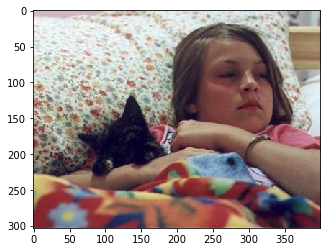

In [3]:
import matplotlib.pyplot as plt
train_image = tf.keras.preprocessing.image.load_img('Cat_dog_data/train/cats/cat.6.jpg')
plt.imshow(train_image)
plt.show()

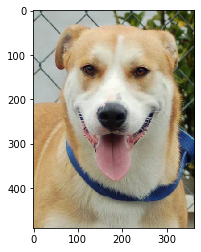

In [4]:
test_image = tf.keras.preprocessing.image.load_img('Cat_dog_data/validation/dogs/dog.1034.jpg')
plt.imshow(test_image)
plt.show()

In [5]:
train_data_dir = 'Cat_dog_data/train'
test_data_dir = 'Cat_dog_data/validation'

In [6]:
# import tensorflow as tf 相關套件
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from glob import glob # 多檔案一起執行

# set dimensions of our images.
img_width, img_height =150,150
# 壓成150X150 可調整
jpglist = glob('./Cat_dog_data/*.[jJ][pP][gG]')
for i in jpglist:
    im = Image.open(i)
    im2 = im.resize((150,150))


In [7]:
# this is the augmentation configuration we will use for training
# ImageDataGenerator 統一處理標準化, shear_range/zoom_range/horizontal_flip讓訓練參數變更多
train_datagen = ImageDataGenerator(
        rescale=1. /255,
        shear_range= 0.2,
        zoom_range= 0.2,
        horizontal_flip= True)
# only rescaling 驗證資料不用擴充
test_datagen = ImageDataGenerator(rescale=1. /255)
# featurewise_center =True
# featurewise_std_normalization=True

#高階API .flow_from_directory 整理資料與label
batch_size = 16
# class_mode = "binary" if # classes = 2 
# class_mode = "categorical" if # classes >= 2
train_dataset = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width,img_height), #(150,150)
        batch_size = batch_size,
        class_mode = "categorical")
test_dataset = test_datagen.flow_from_directory(
        test_data_dir,
        target_size = (img_width,img_height),
        batch_size = batch_size,
        class_mode ='categorical')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
test_dataset.image_shape

(150, 150, 3)

In [9]:
test_dataset.labels[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
# build CNN model
model = Sequential()
####################
# 模型加入【第一層卷積層】
####################
model.add( Conv2D( filters=36, 
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation='relu',
                           input_shape=(150,150,3)       
                 )
         )
####################
# 模型加入【正則化】
####################
model.add(Dense(64, input_dim=64,

                kernel_regularizer=regularizers.l2(0.01)
               )
         )
####################
# 模型加入【第一層池化層】
####################
model.add( MaxPooling2D( pool_size = (2, 2) ) )
####################
# 模型加入【第二層卷積層】
####################
model.add( Conv2D( filters=49, 
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation='relu',
                           input_shape=(150,150,3)        # 使用 relu 激活函數
                 )
         )
####################
# 模型加入【第二層池化層】*3
####################
model.add( MaxPooling2D( pool_size = (2, 2) ) )
model.add( MaxPooling2D( pool_size = (2, 2) ) )
model.add( MaxPooling2D( pool_size = (2, 2) ) )
####################
# 模型加入【平坦層】
####################
model.add( Flatten(input_shape=(150,150,3)) )
####################
# 模型加入【隱藏層】
model.add( Dense( units = 30                   
                , kernel_initializer = 'normal' 
                , activation = 'relu'           
                )
         )
####################
# 模型加入【輸出層】
####################
model.add( Dense( units = 10                    
                , kernel_initializer = 'normal' 
                , activation = 'relu'        
                )
         )
model.add( Dense( units = 2                    
                , kernel_initializer = 'normal' 
                , activation = 'softmax'        
                )
         )
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 36)      1008      
_________________________________________________________________
dense (Dense)                (None, 150, 150, 64)      2368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 49)        28273     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 49)        0         
__________________

In [11]:
# 編譯模型 compile model
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [13]:
# 訓練模型 model.fit

history = model.fit(train_dataset,batch_size =64,epochs= 30,validation_data= test_dataset)

Epoch 1/30
125/125 [==============================] - 79s 633ms/step - loss: 0.7296 - acc: 0.5050 - val_loss: 0.7029 - val_acc: 0.5013
Epoch 2/30
125/125 [==============================] - 66s 529ms/step - loss: 0.6967 - acc: 0.5340 - val_loss: 0.6905 - val_acc: 0.5838
Epoch 3/30
125/125 [==============================] - 59s 473ms/step - loss: 0.6776 - acc: 0.5965 - val_loss: 0.6621 - val_acc: 0.6037
Epoch 4/30
125/125 [==============================] - 58s 464ms/step - loss: 0.6497 - acc: 0.6320 - val_loss: 0.6665 - val_acc: 0.6225
Epoch 5/30
125/125 [==============================] - 56s 445ms/step - loss: 0.6318 - acc: 0.6490 - val_loss: 0.6220 - val_acc: 0.6562
Epoch 6/30
125/125 [==============================] - 58s 463ms/step - loss: 0.6430 - acc: 0.6385 - val_loss: 0.6287 - val_acc: 0.6587
Epoch 7/30
125/125 [==============================] - 57s 460ms/step - loss: 0.6117 - acc: 0.6855 - val_loss: 0.5888 - val_acc: 0.6812
Epoch 8/30
125/125 [==============================] - 5

Text(0, 0.5, 'acc')

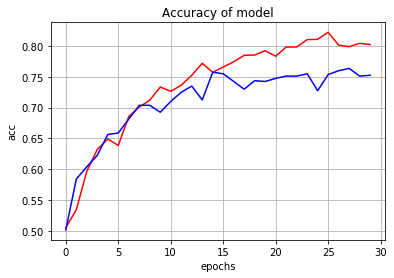

In [14]:
# 畫圖 train/test Accuracy plot

plt.title('Accuracy of model')
plt.plot(history.history['acc'],color='red')
plt.plot(history.history['val_acc'],color='blue')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('acc')

Text(0, 0.5, 'acc')

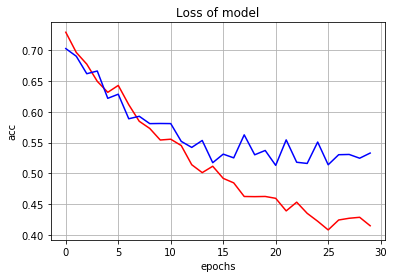

In [15]:
# 畫圖 train/test Loss/cost plot
plt.title('Loss of model')
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('acc')

In [16]:
#存模型和參數
model.save('CNN_model_dog_cat.h5') 

In [17]:
# 將test data set 重新照順序排好 shuffle=False
test_dataset = test_datagen.flow_from_directory(
        test_data_dir,
        target_size = (img_width,img_height),
        batch_size = batch_size,
        shuffle=False,
        class_mode ='categorical')

Found 800 images belonging to 2 classes.


In [18]:
# 預測 model.predict & np.argmax

prediction = model.predict_classes( test_dataset )
print( prediction )
print( prediction[340:360] )
label_desc = [ 'cat', 'dog' ]

# Prediction 數值轉換成 Prediction 說明文字
prediction_desc = list( map( lambda x : label_desc[x], prediction ) )

# 顯示圖片集第 340 ~ 360 筆的預測結果
print( prediction_desc[340:360] )

[0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 

In [19]:
import pandas as pd
import numpy as np
filenames = os.listdir('test')

test_data = pd.DataFrame({
    'filename': filenames
})

In [20]:
saved_model = tf.keras.models.load_model('CNN_model_dog_cat.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


cat (貓)


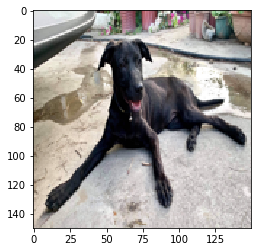

(150, 150, 3)
cat (貓)


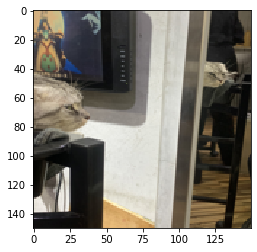

(150, 150, 3)
cat (貓)


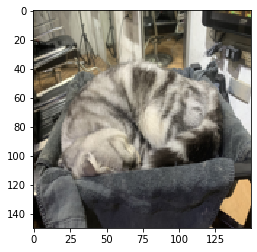

(150, 150, 3)
cat (貓)


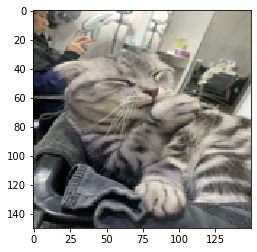

(150, 150, 3)
cat (貓)


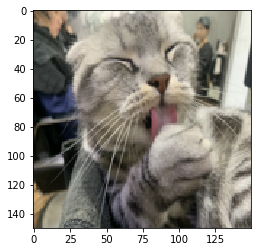

(150, 150, 3)
cat (貓)


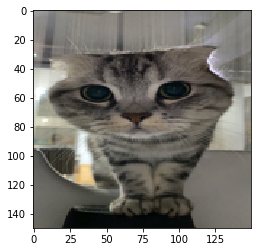

(150, 150, 3)
dog (狗)


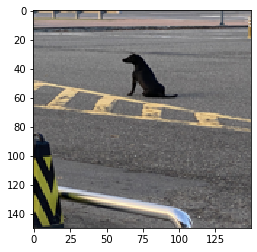

(150, 150, 3)
dog (狗)


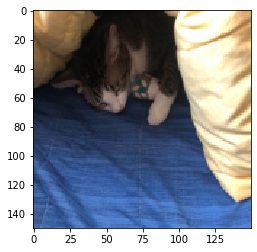

(150, 150, 3)
cat (貓)


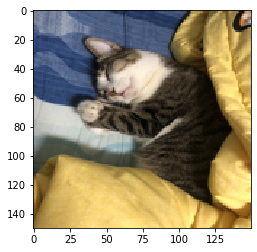

(150, 150, 3)
cat (貓)


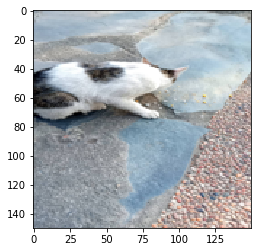

(150, 150, 3)
dog (狗)


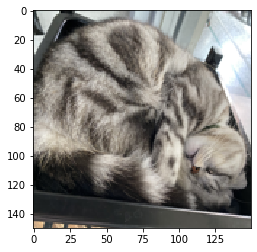

(150, 150, 3)
dog (狗)


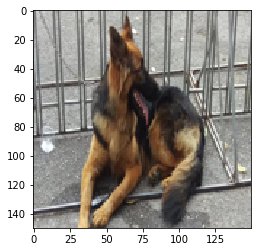

(150, 150, 3)
dog (狗)


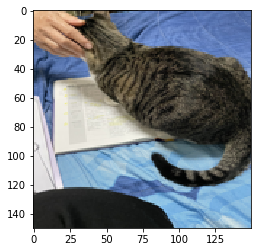

(150, 150, 3)
cat (貓)


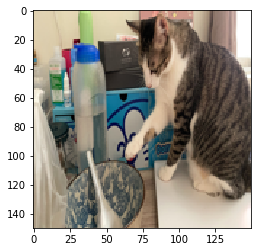

(150, 150, 3)
cat (貓)


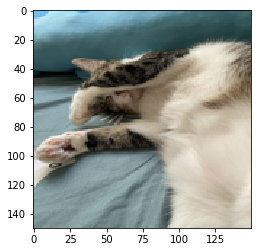

(150, 150, 3)
cat (貓)


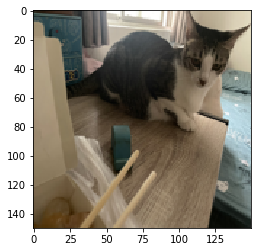

(150, 150, 3)
cat (貓)


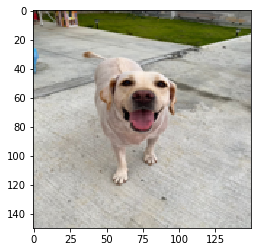

(150, 150, 3)
cat (貓)


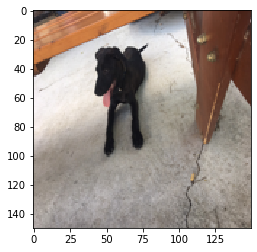

(150, 150, 3)
cat (貓)


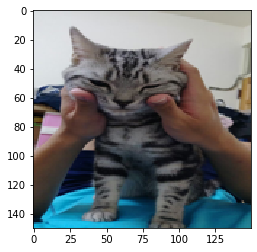

(150, 150, 3)
cat (貓)


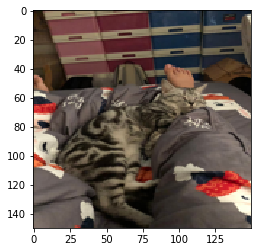

(150, 150, 3)
cat (貓)


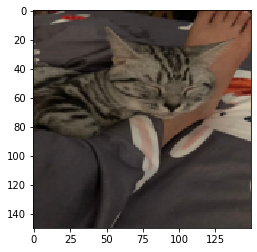

(150, 150, 3)
cat (貓)


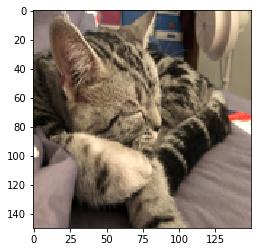

(150, 150, 3)
cat (貓)


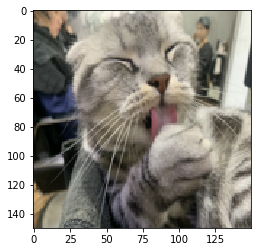

(150, 150, 3)
dog (狗)


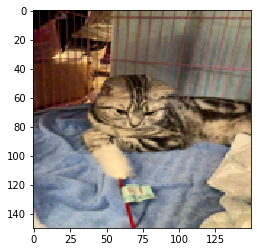

(150, 150, 3)
cat (貓)


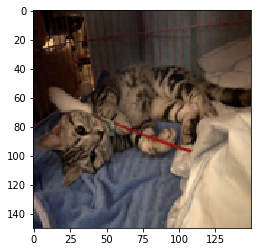

(150, 150, 3)
cat (貓)


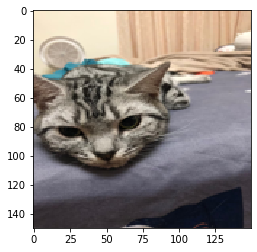

(150, 150, 3)
cat (貓)


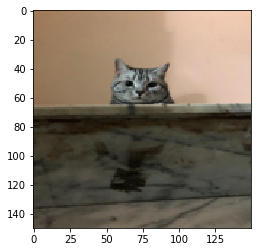

(150, 150, 3)
cat (貓)


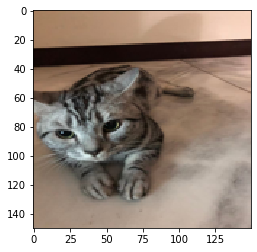

(150, 150, 3)
cat (貓)


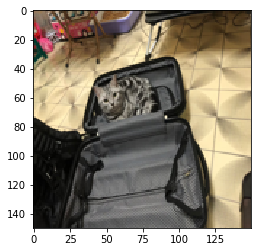

(150, 150, 3)
cat (貓)


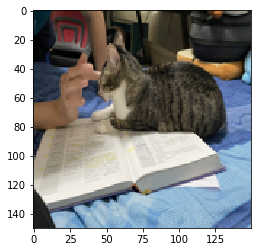

(150, 150, 3)
cat (貓)


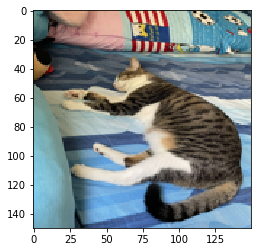

(150, 150, 3)
cat (貓)


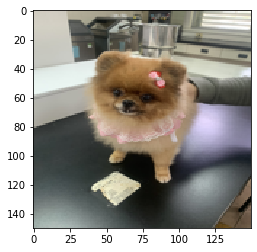

(150, 150, 3)
cat (貓)


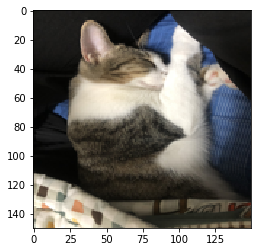

(150, 150, 3)
cat (貓)


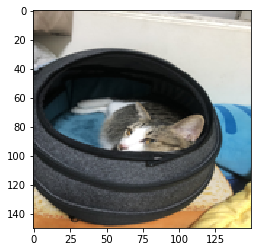

(150, 150, 3)
cat (貓)


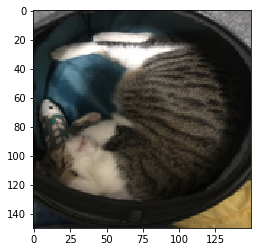

(150, 150, 3)


In [21]:
label = {
1 : 'cat (貓)',
0 : 'dog (狗)'}
from PIL import Image
for i in range(35):
    img = Image.open('test/'+filenames[i])
    img2=img.resize((150,150,))                        
    test_image = np.array(img2)
    test_pred = model.predict(test_image.reshape(-1,150,150,3).astype(np.float32))
    print(label[np.argmax(test_pred, axis=1)[0]])
    plt.imshow(test_image, cmap='gray')
    plt.show()
    print(test_image.shape)